# Regularización L2.

#### Autor: Tomás Valenzuela

### Introducción:


### Aprendizaje supervisado:
En Machine Learning, aprendizaje supervisado es la idea de aprender desde los datos observados mediante un algoritmo con la particularidad de que dichos datos son de la forma $(x_{i}^{t}, y_{i})$ donde: 

* Índice $i$ corresponde a la i-ésima observación.
* $x_{i} \in \mathbb{R}^{n}$ es el vector de n features (input).
* $y_{i}$ corresponde al output y es el valor que se intenta predecir y/o explicar mediante el input.

Algunos de los algoritmos más conocidos para este tipo de aprendizaje son:

* K - Vecinos más cercanos 
* Regresión Lineal
* Regresión Logística
* Support Vector Machines (SVM)
* Árbolés de Decisión
* Redes neuronales


### Ajuste de modelos:

En un algoritmo de aprendizaje supervisado es de especial relevancia "aprender" de forma óptima a partir de los datos. En este sentido existen tres posibilidades:

* Underfittig: Corresponde a modelos con un sesgo inductivo errado o bien con muy baja capacidad que no permite al modelo ajustarse adecuadamente a los datos.
* Modelo apropiado: Corresponde a un modelo que se adecua de forma correcta a los datos, de forma suave y sin capturar el ruido de estos.
* Overfitting: Corresponde a modelos de capacidad muy elevada, los cuales sobreajustan a los datos de entrenamiento capturando también el ruido de estos y que tienen como consecuencia una pérdida de capacidad de generalización para otros datos.

Una ilustración de los tres tipo de modelos mencionados puede observarse en la imagen de a continuación:

<img src="overfitting.png">
Imagen tomada del libro Deep Learning por I.Goodfellow, Y.Bengio y A.Courville. 
                                                                                                                                                                                            
  Una característica de los modelos de Machine Learning es que estos típicamente son capaces de sufrir serios problema de overfitting, lo cual es indeseado por lo mencionado anteriormente. Es por esto que generar alguna forma inteligente y eficiente de evitar este problema adquiere una importante relevancia.



### Regularización
Como los algoritmos de ML pueden sufrir serios problema de overfitting, se han inventado diversas técnicas para solucionar este problema. Una de estas es llamada "regularización".
Recordemos que para entrenar y encontrar el vector(es) de parámetros $\omega$ de una red neuronal y/o regresión, se debe resolver un problema de optimización:

$$\min_{\omega} J(\omega; X, y)$$

Donde el término $J(\omega; X, y)$  (Típicamente el ECM o bien la log-verosimilitud) es una función que cuantifica la medida de ajuste del modelo a los datos observados , seleccionando un parámetro $\omega$ adecuado.

Podemos observar que este es un problema de optimización irrestricto, por lo que la solución será aquella que disminuya lo máximo posible el término $J(\omega; X, y)$ sin importar lo que ocurra con el vector $\omega$. Este último típicamente aumentará lo suficientemente su norma o magnitud, dando el peso suficiente a cada entrada del vector que permita cumplir con el objetivo de minimización. En otras palabras, es de esperar que la norma del vector de parámetros tienda a crecer lo suficiente para encontrar la solución óptima.

De esta manera, la técnica de regularización lo que busca es agregar a la función objetivo del problema de optimización un término $\alpha \cdot \Omega(\omega)$, generando un nuevo problema de optimización:


$$\min_{\omega} J(\omega; X, y) + \alpha \cdot \Omega(\omega)$$

donde:

* $\Omega(\omega)$ es un término que cuantifica la magnitud del vector de parámetros $\omega$.
* $\alpha \geq 0$ es el peso que asignaremos al término $\Omega(\omega)$ en la función objetivo. Este es un hiperparámetro que fijamos al inicio del entrenamiento.

La razón de agregar dicho término a la función objetivo es penalizar su valor, aumentándolo cuando la magnitud del vector de parámetros $\omega$ crezca. Esto obligará al algoritmo de minimización a encontrar una solución que posea un equilibrio entre $J(\omega; X, y)$ y $\alpha \cdot \Omega(\omega)$ tal que sumados su valor sea el mínimo posible, en otras palabras, este nuevo término impedirá que el valor $J^{*}(\omega; X, y)$ óptimo del problema inicial se alcance, disminuyendo por tanto el ajuste del modelo a los datos.

Es posible notar entonces que la distancia o diferencia entre el $J^{*}(\omega; X, y)$ óptimo del problema original y el nuevo $J^{'}(\omega; X, y)$ óptimo para el problema de regularización dependerá del término $\alpha \cdot \Omega(\omega)$. Un valor $\alpha = 0$ significa que no existe regularización en el problema de minimización, con lo cual el óptimo en ambos problemas será el mismo (ya que el problema será el mismo). Por otra parte, en la medida que el término $\alpha$ crezca se inducirá a una mayor diferencia entre ambos términos de ajuste óptimos.


### ¿Qué término $\Omega(\omega)$ debo considerar?
Por álgebra lineal, sabemos que una manera de cuantificar el tamaño de un vector $w \in \mathbb{R}^{n}$ es mediante el operador sublineal llamado norma-p, denotada por $ \left\|  \mathord{\cdot} \right\|_{p}$, y definida para $1 \leq p \leq \infty$ como:

$$ \left\|  w \right\|_{p} =  \left( \sum_{i=1}^{n} |w_{i}|^{p} \right)^{1/p}$$

Norma-p es la generalización de la norma Euclidíana, de hecho, podemos observar que si consideramos $p = 2$ obtenemos la norma Euclidiana, $ \left\|  \mathord{\cdot} \right\|_{2}$:

$$\left\|  w \right\|_{2} =  \left( \sum_{i=1}^{n} |w_{i}|^{2} \right)^{1/2}$$

Así, podemos considerar $\Omega(\omega) = \left\|  \omega \right\|_{p}^{p}$, creando el problema de optimización:


$$\min_{w} J(\omega; X, y) + \alpha \cdot \left\| \omega \right\|_{p}^{p}$$

Este último recibe el nombre de problema de regularización $L^{P}$, donde LP depende del valor escogido para la norma-p. Diferentes elecciones de $p$ pueden conducir a diferentes soluciones o tipos de soluciones. 


### Regularización $L^{2}$:

Hoy nos enfocaremos en la elección de la norma euclidiana, es decir, una elección de $p = 2$ que recibe el nombre de regularización $L^{2}$ o también conocida como "ridge regression".
Como ya hemos mencionado, el problema de minimización buscará un equilibrio entre ambos términos de la función objetivo, por lo que obviamente intentará reducir en cierta medida la norma euclidiana del vector de parámetros. 

Cada técnica de regularización tiene características propias, de hecho, la elección de distintas normas para término de regularización inducirá a distintos tipos de soluciones. Una característica de la regularización $L^{2}$ es que esta no obliga a que algunos términos se anulen y otros crezcan sino que tiene un efecto de disminución generalizada de los coeficientes. Este hecho propio de la regresión $L^{2}$ presenta una ventaja particular ya que adicionalmente a permitir reducir el overfitting, será útil en escenarios en los que se tengan datos de entrada que estén correlacionados entre sí, pues sabemos por estadística que una disminución en los coeficientes obligará a una disminución en la correlación de los datos.

Podemos visualizar el comportamiento de la Regularización mediante la siguiente imagen:

<img src="ridge.png">
Imagen tomada del libro: An Introduction to Statistical Learning por G.James, D.Witten, T.Hastie, R.Tibshirani.   

La visualización anterior corresponde a un caso en dos dimensiones en los que se intenta encontrar el óptimo de un problema de regularización $L^{2}$. Las curvas rojas representan a las curvas de nivel para el error cuadrático medio. En el centro de estas curvas se muestra la solución que se obtendría en el caso del problema sin regularización. Por otra parte, el área celeste corresponde a los valores que puede tomar el vector de parámetros (en este caso bidimensional) regidos por la restricción de norma euclidiana.
Como la norma euclidiana produce un área de restricción circular o de (n-esfera considerando n dimensiones), entonces la intersección entre las curvas de nivel elípticas del ECM y la de la norma euclidiana, que es circular y por tanto no tiene vértice en punta siempre será en un punto fuera de los ejes coordenados, esto implica automáticamente encontrar entonces soluciones distintas de cero tal como se mencionó anteriormente aunque, lógicamente las entradas del vector de parámetros tenderán a concentrarse hacia números más pequeños.

### Regularización $L^{2}$ en un problema de regresión:

Generalmente, los problemas de optimización para ML son resuelto mediantes métodos numéricos tal como descenso de gradiente y otros derivados de este que son más complejos y eficientes. Sin embargo, para el caso de un problema de regresión lineal este procedimiento no es necesario ya que podemos obtener fácilmente el vector $\omega$ óptimo que minimiza a la función objetivo aprovechándonos de las buenas propiedades del problema: linealidad y convexidad de la función objetivo y además la propiedad se tratarse de un problema de optimización irrestricto. Luego, por cálculo vectorial sabemos que el óptimo se encuentra en el punto que anula al gradiente de la función objetivo.

Definamos entonces:

* La matriz de diseño de $m$ observaciones considerando $n$ features explicativas: 

$$\boldsymbol{X} = \begin{bmatrix}1 & x_{0,1} & x_{0,2} &... & x_{0,n}\\
1 & x_{1,1} & x_{1,2} &... & x_{1,n}\\
\vdots & \vdots & \vdots & ... &  \vdots \\
1 & x_{m,1} & x_{m,2} &... & x_{m,n}
\end{bmatrix} $$


* Vector de salida:

$$\boldsymbol{y}^{t} = [y_1, y_2, ..., y_m]$$


* Vector de parámetros:


$$\boldsymbol{w}^{t} = [w_0, w_1, ..., w_n]$$


Recordando la propiedad de la norma euclideana para un vector $z$ cualquiera:

$$\left\|  z \right\|_{2}^{2} =  \sum_{i=1}^{n} |z_{i}|^{2} = z^{t}z$$

Podemos reescirbir entonces el error cuadrático medio y el término de regularización de forma matricial como sigue:


$${\rm MSE} = \frac{1}{m} (Xw - y)^{t} (Xw - y)$$

$$\alpha \cdot \Omega(w) =  \left\|  w \right\|_{2}^{2} =  \alpha \cdot w^{t}w$$



Así, la función objetivo a minimizar queda descrita matricialmente como:


\begin{align*} 
F(w;X,y) &= {\rm MSE} + \alpha \cdot \left\|  w \right\|_{2}^{2}\\
&= \frac{1}{m} (Xw - y)^{t} (Xw - y) + \alpha \cdot w^{t}w\\ 
&=  \frac{1}{m} (w^{t}X^{t} - y^{t}) (Xw - y)  + \alpha \cdot w^{t}w\\
&= \frac{1}{m} \left( w^{t}X^{t}Xw - w^{t}X^{t}y - y^{y}Xw + y^{t}y \right)  + \alpha \cdot w^{t}w\\
&= \frac{1}{m} \left( w^{t}Qw - 2b^{t}w + y^{t}y \right)  + \alpha \cdot w^{t}w
\end{align*}

Donde:

* $Q = X^{t}X$ es una matriz simétrica (Este hecho nos sirve para derivar).
* $b^{t} = y^{t}X$


Ahora bien, para derivar matricialmente, recordemos dos propiedades útiles:


* Derivada de una forma lineal: $\frac{\partial}{\partial z} b^{t}z = b$

* Derivada de una forma cuadrática con Q matriz simétrica:  $\frac{\partial}{\partial z} z^{t}Qz = 2Qz$


Teniendo esto en cuenta podemos obtener entonces de manera sencilla la solución óptima para el problema de minimización derivando la función objetivo con respecto al vector parámetro $w$ e igualando a cero. 



\begin{align*} 
\frac{\partial}{\partial w}F(w;X,y) &= 0\\
& \Leftrightarrow \frac{\partial}{\partial w} \left(\frac{1}{m} \left( w^{t}Qw - 2b^{t}w + y^{t}y \right)  + \alpha \cdot w^{t}w \right) = 0 \\
& \Leftrightarrow \frac{1}{m} (2Qw - 2b) + 2 \alpha \cdot w =  0\\
& \Leftrightarrow \frac{1}{m} (Qw - b) +  \alpha \cdot w =  0\\
& \Leftrightarrow  Qw - b +  \alpha  m \cdot w =  0\\
& \Leftrightarrow  (Q + \alpha m \cdot \mathrm{I})w =  b\\
& \Leftrightarrow  w =  (Q + \alpha m \cdot \mathrm{I})^{-1}b\\
& \Leftrightarrow  w =  (X^{t}X + \alpha m \cdot \mathrm{I})^{-1}X^{t}y
\end{align*}

La última igualdad corresponde a la ecuación normal para $\omega$ en el problema de regularización $L^{2}$ para regresión lineal.

Obs: Notemos que si $\alpha = 0$, la ecuación normal se transforma en $w =  (X^{t}X)^{-1}X^{t}y$ que es la correspondiente a un problema de regresión lineal sin regularización!.


# Aplicando lo aprendido

In [363]:
# Importamos librerías requeridas

import numpy as np
import matplotlib.pyplot as plt

#### Creamos una clase que nos permetirá efectuar una regresión polinomial sobre los datos:

In [364]:
class PolyRegression:
    # Clase que implementa una regresión polinomial
    
    def __init__(self, x_train, y_train, x_test, y_test, degree, alpha):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train.reshape(y_train.shape[0], 1)
        self.y_test = y_test.reshape(y_test.shape[0], 1)
        self.degree = degree
        self.alpha = alpha
        self.w = None
        
    def build_design_matrix(self, x, degree):
        # Función que permite obtener la matriz de diseño polinomial
        
        m = x.shape[0]
        degree_vector = np.arange(degree + 1).reshape(1, degree + 1)
        x_equal_cols = np.repeat(x[:, np.newaxis], degree + 1, 1).reshape(m, degree + 1)
        return np.power(x_equal_cols, degree_vector)
    
    def solve_min_problem(self, x, y):
        # Función que permite obtener w óptimo mediante las ecuaciones normales
        
        X = self.build_design_matrix(x, self.degree)
        alpha = self.alpha
        m = X.shape[0]

        left_matrix = (X.T.dot(X) + alpha * m * np.identity(X.shape[1]))
        inversa = np.linalg.solve(left_matrix, np.identity(left_matrix.shape[0], dtype = float))
        right_matrix = X.T.dot(y)
        self.w = inversa.dot(right_matrix)
    
    def predict(self, x):
        # Función que retorna la predicción a partir de datos y el vecto de parámetros
        X = self.build_design_matrix(x, self.degree)
        
        return X.dot(self.w)
    
    def get_MSE(self, y_true, y_pred):
        # Función que retorna el error cuadrático medio de una predicción
        
        return np.average((y_true - y_pred)**2)
        

#### Implementamos funciones que nos permitirán obtener datos de "reales" de una función escogida, datos de entrenamiento y datos para test.

In [365]:
def f(x):
    # Generaremos datos ficticios medianta esa función
    return x * np.cos(x * np.pi)
    
def add_noise(y):
    # Función que permite agregar ruido de una distribución normal a datos
    noise = np.random.normal(0, 0.2, (y.shape[0], y.shape[1]))
    return y + noise

def generate_data(size_original, size_train, size_test, left_lim, right_lim):
    np.random.seed(111)
    
    x_star = np.linspace(left_lim, right_lim, size_original).reshape(size_original, 1)
    x_train = np.linspace(left_lim, right_lim, size_train).reshape(size_train, 1)
    x_test = np.linspace(left_lim, right_lim, size_test).reshape(size_test, 1)
    
    y_star = f(x_star)
    y_train = add_noise(f(x_train))
    y_test = add_noise(f(x_test))
    
    return x_star, y_star, x_train, y_train, x_test, y_test
    

#### También implementamos funciones que nos permitirán mostrar gráficos en una grilla ordenada.

In [366]:
def get_index_params(n_sub_plots, n_columns):
    "Función que permite obtener los índices en los cuales se pondrán los subplots"
    
    n_rows = n_sub_plots// n_columns
    
    if n_sub_plots % n_columns == 0:
        index = [(i, j) for i in range(n_rows) for j in range(n_columns)]
        return n_rows, n_columns, index, []
    
    n_delete = n_columns - (n_sub_plots % n_columns)
    index = [(i, j) for i in range(n_rows + 1) for j in range(n_columns)]
    return n_rows + 1, n_columns, index[:-n_delete], index[-n_delete:]


def initialize_plot(y_size, x_size, n_sub_plots, n_columns):
    "Función que inicializa el gráfico de subplots vacíos a partir de los índices"
    
    n_rows, n_columns, index, index_delete = get_index_params(n_sub_plots, n_columns)
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(y_size, x_size))
    remove_subplot(axs, index_delete)
    return fig, axs, index
    

def remove_subplot(axs, index_list):
    " Función que remueve subplots vacíos "
    
    for tupla in index_list:
        axs[tupla[0], tupla[1]].remove() 


## Ya tenemos implementadas todas las funciones necesarias para efectuar nuestro análisis.

### Parte 1 : Creación y visualización de datos.

En esta sección en primer lugar crearemos los datos a partir de la función:

$$x \cdot \cos (x \pi)$$

Es decir, los datos reales estarán basados en dicha función. Adicionalmente, creamos un set de entrenamiento y un set de test a partir de dichos datos pero agregándoles un ruido que distribuye normal. 
Finalmente se visualizan los datos.

In [367]:
# Creación de los datos
x_star, y_star, x_train, y_train, x_test, y_test = generate_data(100, 50, 20, -1.5, 1.5)

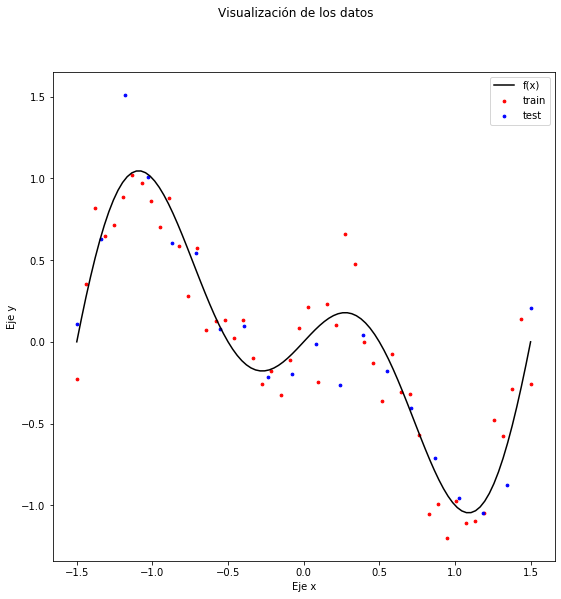

In [368]:
# Visualización de los datos

plt.figure(figsize=(9, 9))
plt.plot(x_star, y_star, 'black', label = 'f(x)')
plt.scatter(x_train, y_train, c = 'red',  marker='.', s=30, label = 'train')
plt.scatter(x_test, y_test, c = 'blue',  marker='.', s=30, label = 'test')
plt.legend()
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.suptitle('Visualización de los datos')
plt.show()

### Parte 2 : Analizamos ajustes a los datos bajo polinomios de distintos grados.

En esta sección nos preocupamos de encontrar el grado del polinomio que mejor ajusta a los datos sin añadir regularización al problema. El fin pedagógico de esta sección es observar polinomios que se encuentran en una zona de underfitting, otros que hacen un overfitting sobre los datos mientras que hay alguno en particular que es el que mejor se ajusta a los datos, de forma equilibrada.

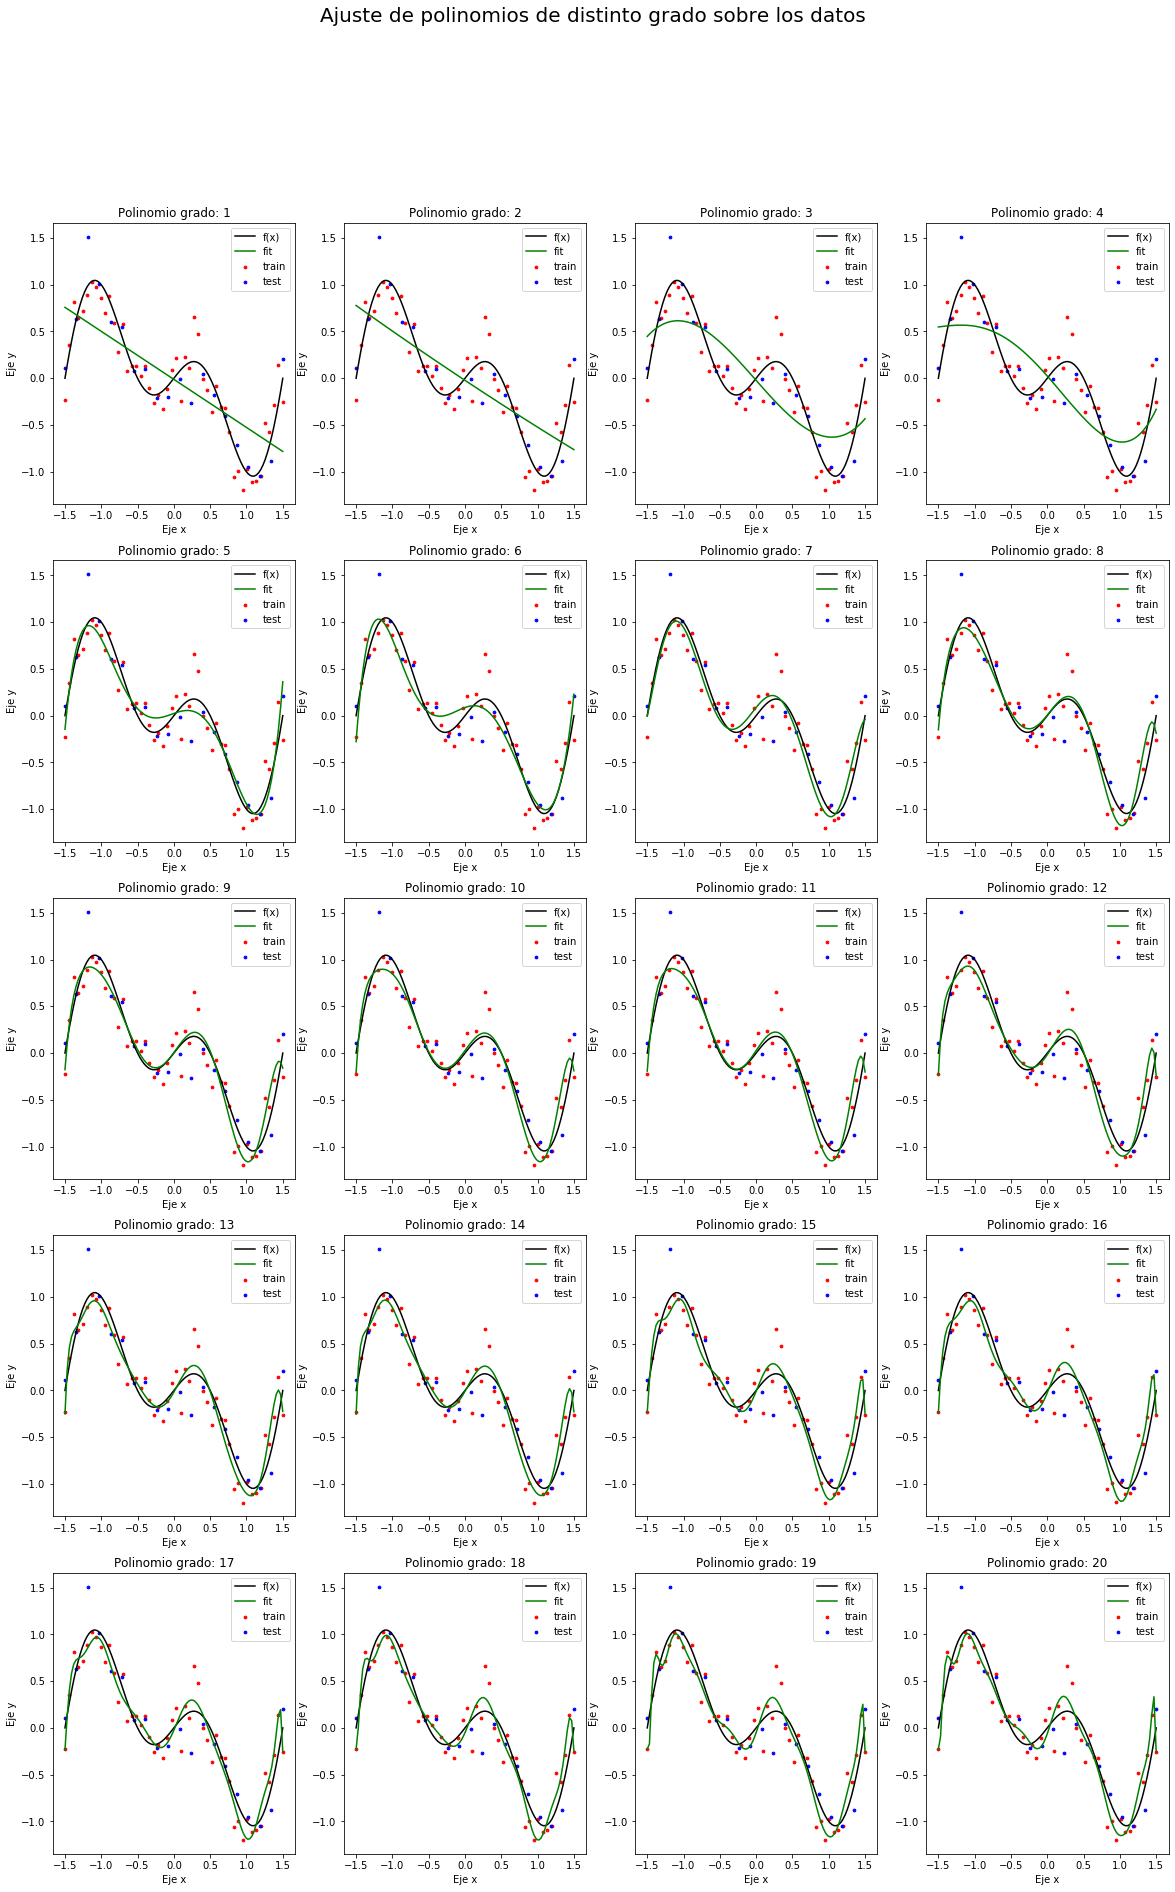

In [369]:
degrees = np.arange(1, 21)

# Listas de errores a plotear
MSE_train = []
MSE_test = []

# Creamos grilla de gráficos para añadir subplots de ajustes por polinomio
fig, axs, index = initialize_plot(y_size = 20, x_size = 30, n_sub_plots = degrees.shape[0] , n_columns = 4)
fig.suptitle('Ajuste de polinomios de distinto grado sobre los datos', fontsize=20)

contador = 0
for degree in degrees:
    # Efectuamos regresión ocupando datos de entrenamiento
    reg = PolyRegression(x_train, y_train, x_test, y_test, degree = degree, alpha = 0)
    reg.solve_min_problem(reg.x_train, reg.y_train)
    
    # Efectuamos predicciones para los distintos set de datos
    y_barra = reg.predict(x_star)
    y_train_pred = reg.predict(reg.x_train)
    y_test_pred = reg.predict(reg.x_test)
    
    # Añadimos subplot de la iteración actual a la grilla
    i, j = index[contador]
    axs[i, j].plot(x_star, y_star, 'black', label = 'f(x)')
    axs[i, j].plot(x_star, y_barra, 'green', label = 'fit')
    axs[i, j].scatter(x_train, y_train, c = 'red',  marker='.', s=30, label = 'train')
    axs[i, j].scatter(x_test, y_test, c = 'blue',  marker='.', s=30, label = 'test')
    axs[i, j].legend()
    axs[i, j].set_title(f'Polinomio grado: {degree}')
    axs[i, j].set(xlabel='Eje x', ylabel= 'Eje y')
    
    # Añadimos MSE a las listas repectivas
    MSE_train.append(reg.get_MSE(y_train, y_train_pred))
    MSE_test.append(reg.get_MSE(y_test, y_test_pred))

    contador +=1

Los gráficos anteriores muestran que los mejores ajustes se encuentran aproximadamente para los polinomios de grado 5 a 8 aproximadamente. Sin embargo, para tener una noción más clara, podemos graficar los errores cuadráticos medios generados para los set de entrenamiento y set de test en los distintos casos.

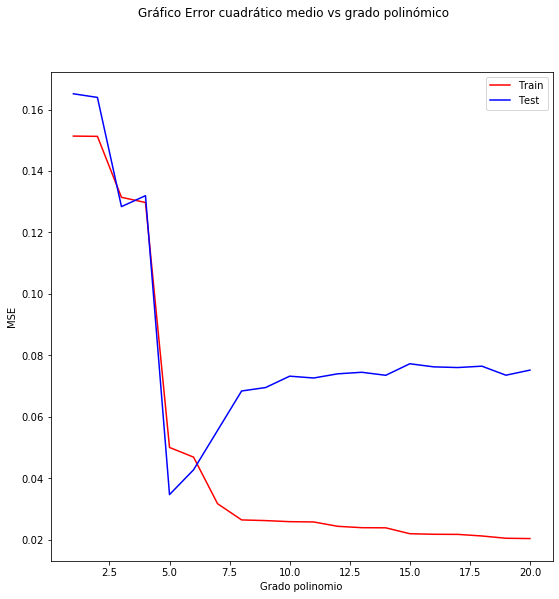

In [370]:
# Gráficos para MSE train y MSE test

plt.figure(figsize=(9, 9))
plt.plot(degrees, MSE_train, 'red', label = 'Train')
plt.plot(degrees, MSE_test, 'blue', label = 'Test')

plt.legend()
plt.xlabel('Grado polinomio')
plt.ylabel('MSE')
plt.suptitle('Gráfico Error cuadrático medio vs grado polinómico')
plt.show()

Podemos apreciar que la intersección de las curvas se logra para el polinomio de grado 6, es decir, las zonas a la izquierda de este grado representan a zona de underfittig mientras que zonas a la derecha de este representan a las de overfitting.

### Parte 3 : Regularización.
En términos generales, cuando se quiere requiere ajustar un modelo a ciertos datos puede ser muy difícil hallar un grado adecuado polinómico que ajuste mejor a estos. Es posible que en un caso de dos dimensiones, al graficar la curva se pueda tener una noción de qué polinomio podría ser más adecuado para la función o la profundidad requerida para una red neuronal en caso de querer trabajar con una. Sin embargo, casi nunca nos enfrentaremos a problemas de dos dimensiones así como también la cantidad de datos puede ser muy alta, haciendo que el entrenamiento del algoritmo a utilizar sea muy lento como para poder iterar muchas veces cambiando hiperparámetros del modelo hasta hallar el adecuado. Es por lo anterior que se transforma en algo normal setear los hiperparámetros del modelo de forma tal que esté "sobrado" en capacidad para ajustar a los datos, es decir, que en términos naturales sea capaz de overfittear los datos. Es justamente en ese momento en que puede ser de extrema utilidad la regularización, que nos permitirá compensar ese exceso de capacidad del modelo y así evitar el overfitting.


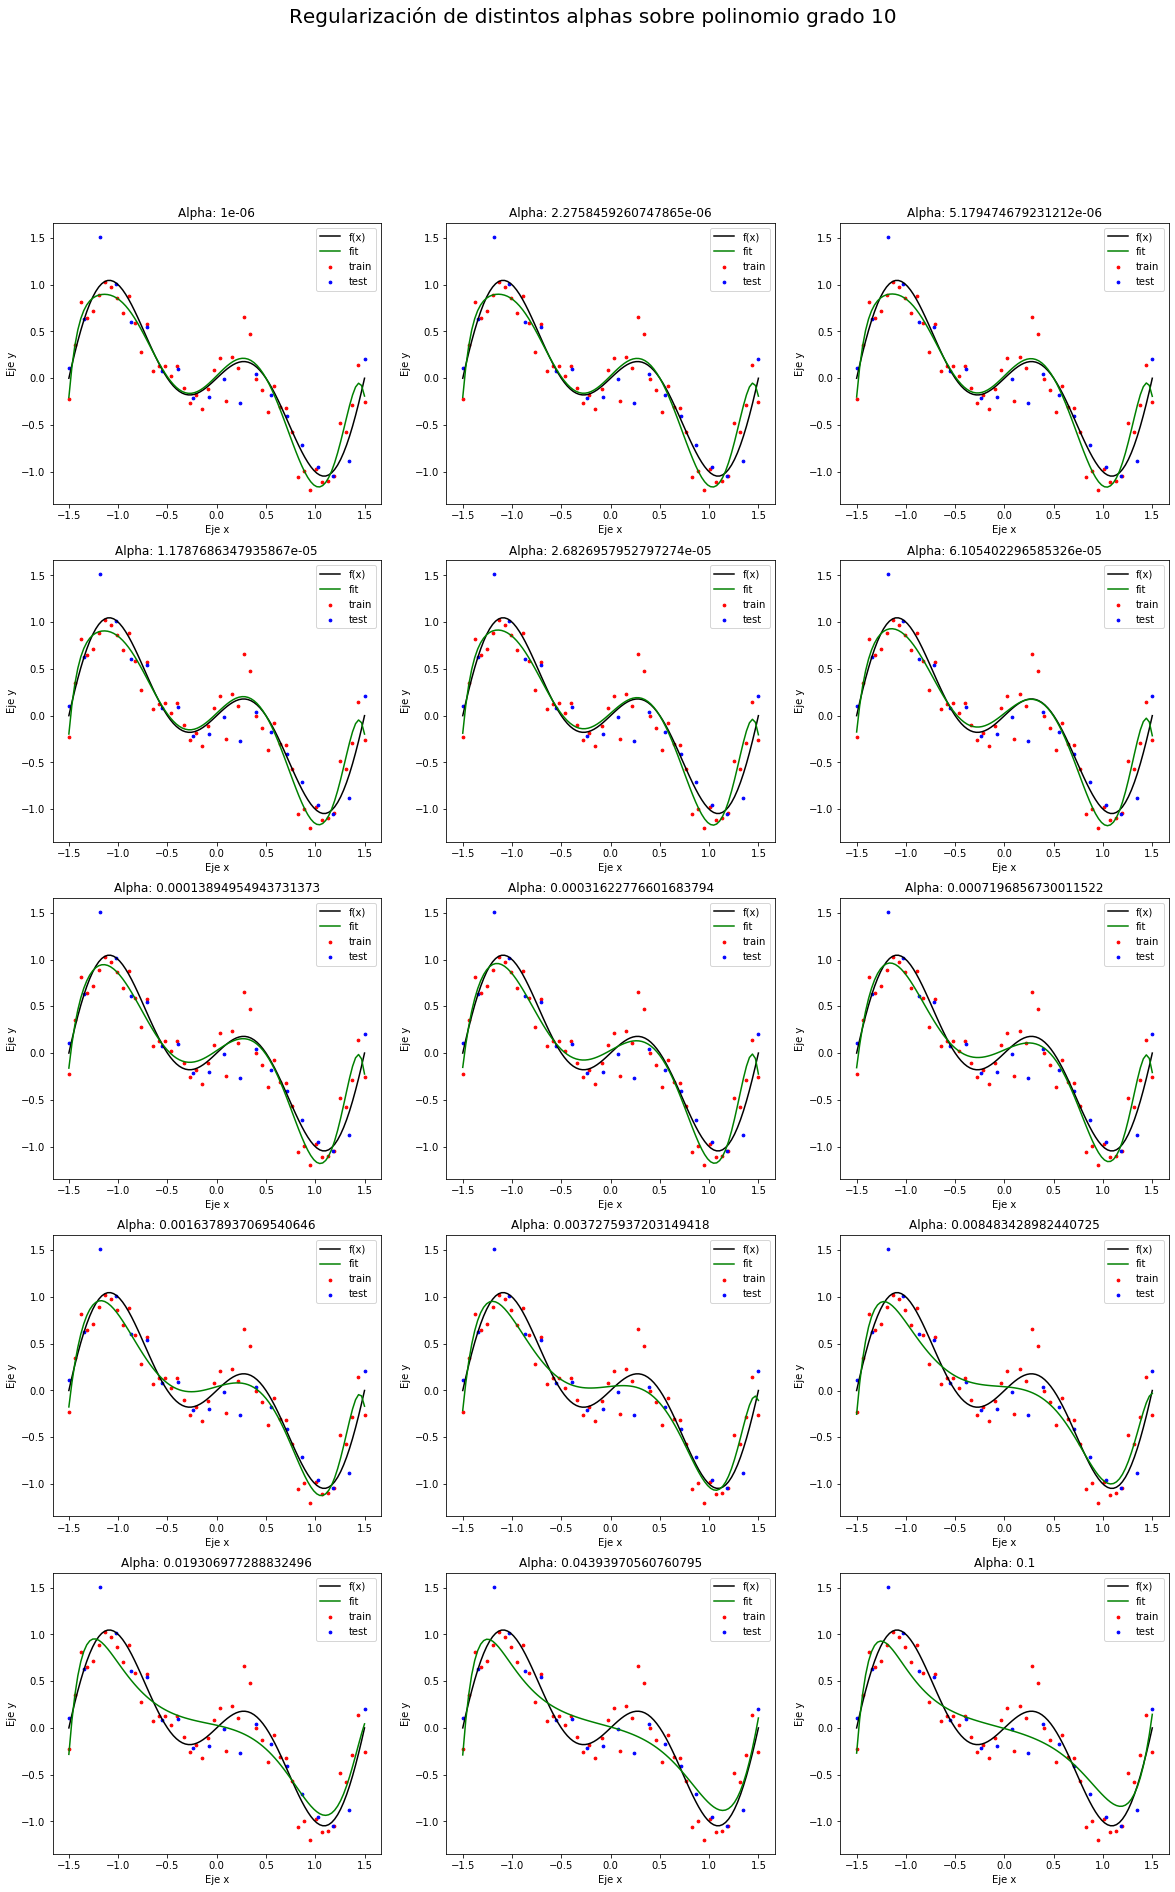

In [371]:
MSE_train = []
MSE_test = []

alphas = np.logspace(-6, -1, 15)
fig, axs, index = initialize_plot(y_size = 20, x_size = 30, n_sub_plots = alphas.shape[0] , n_columns = 3)
fig.suptitle('Regularización de distintos alphas sobre polinomio grado 10', fontsize=20)


contador = 0
for alpha in alphas:
    # Efectuamos regresión ocupando datos de entrenamiento
    reg = PolyRegression(x_train, y_train, x_test, y_test, degree = 10, alpha = alpha)
    reg.solve_min_problem(reg.x_train, reg.y_train)
    
    # Efectuamos predicciones para los distintos set de datos
    y_barra = reg.predict(x_star)
    y_train_pred = reg.predict(reg.x_train)
    y_test_pred = reg.predict(reg.x_test)
    
    # Añadimos subplot de la iteración actual a la grilla
    i, j = index[contador]
    axs[i, j].plot(x_star, y_star, 'black', label = 'f(x)')
    axs[i, j].plot(x_star, y_barra, 'green', label = 'fit')
    axs[i, j].scatter(x_train, y_train, c = 'red',  marker='.', s=30, label = 'train')
    axs[i, j].scatter(x_test, y_test, c = 'blue',  marker='.', s=30, label = 'test')
    axs[i, j].legend()
    axs[i, j].set_title(f'Alpha: {alpha}')
    axs[i, j].set(xlabel='Eje x', ylabel= 'Eje y')
    
    # Añadimos MSE a las listas repectivas
    MSE_train.append(reg.get_MSE(y_train, y_train_pred))
    MSE_test.append(reg.get_MSE(y_test, y_test_pred))

    contador +=1
    


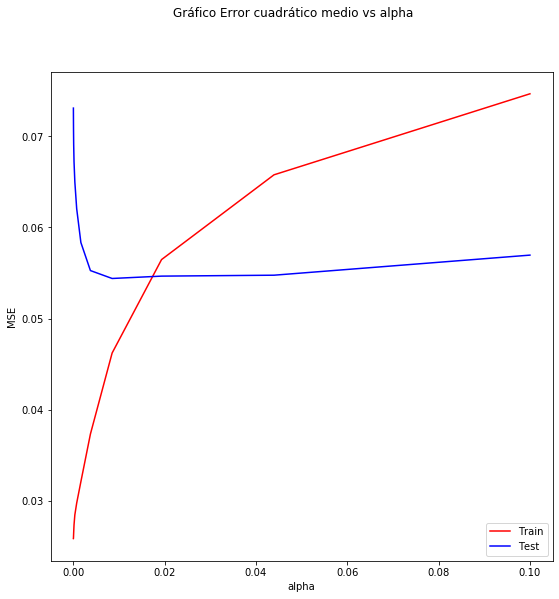

In [372]:
# Gráficos para MSE train y MSE test

plt.figure(figsize=(9, 9))
plt.plot(alphas, MSE_train, 'red', label = 'Train')
plt.plot(alphas, MSE_test, 'blue', label = 'Test')

plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.suptitle('Gráfico Error cuadrático medio vs alpha')
plt.show()

Podemos observar que las curvas de errores se intersectan para un valor $\alpha > 0$. Esto quiere decir que la regularización es óptima para dicho alpha o en una vecindad de este.

# Conclusiones.

Mediante las secciones teóricas y prácticas podemos efectuar las siguientes conclusiones:

* La regularización es de gran utilidad cuando ocuparemos un modelo de alta capacidad para ajustar a los datos.

* En caso de considerar un modelo de baja capacidad, es decir que se encuentre en una zona de underfitting, entonces el aplicar regularización tendrá efectos negativos, pues disminuirá aún más el ajuste de los datos de entrenamiento.

* Para funciones de mayor grado parecidas a la óptima, (en nuestro caso funciones parecidas a un polinomio de grado 6) se tendrán mejores resultados para valores bajos de alpha.

* Para funciones de mayor grado distintas a la óptima, (en nuestro caso funciones de grado mucho mayor a 6) se tendrán mejores resultados para valores altos de alpha.

* Si consideramos funciones de grado muy lejano al óptimo esta técnica a pesar de corregir y mejorar el modelo, no tendrá buenos resultados respecto del modelo óptimo.



# Referencias

* Deep Learning, 2016, autores: I.Goodfellow, Y.Bengio y A.Courville.
* An Introduction to Statistical Learning, 2017. Autores: G.James, D.Witten, T.Hastie, R.Tibshirani
* Tarea 2, ICM3800, Pontificia Universidad Católica de Chile, profesor: Francisco Sahli.